# Gradient Descent

Gradient descent to find the minimum of the power dissipated in a resistor, given by the formula:
$P = I^2 R$
where $P$ is the power dissipated, $I$ is the current flowing through the resistor, and $R$ is the resistance.

In [53]:
import matplotlib.pyplot as plt
import numpy as np

## Defining function

In [54]:
# I define a constant resistance in ohm
R=5

def power_dissipation(I, R):
    return I**2 * R

# Define the gradient (derivative) of the power dissipation function
def gradient(I, R):
    return 2*I*R


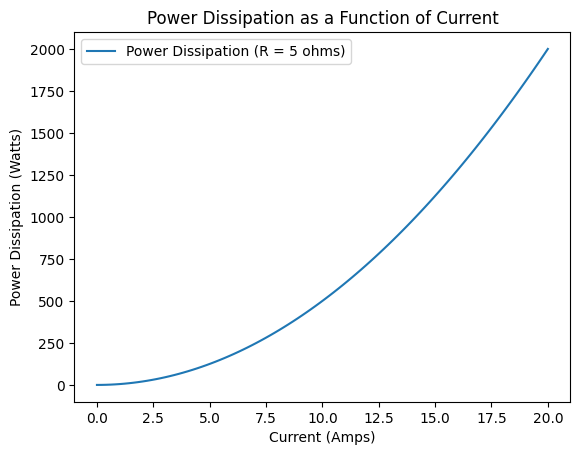

In [55]:
# Plot the power dissipation as a function of current
I_values = np.linspace(0, 20, 100)
P_values = power_dissipation(I_values, R)

plt.plot(I_values, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current")
plt.legend()
plt.show()

## Gradient descent application

In [56]:
# Gradient Descent function to find the minimum
def derivative_descent(derivative, alpha=0.8, I_0=5.0, max_iter=1000):
    """
    Gradient Descent function to find the minimum of a function using its derivative.

    Parameters:
    - derivative: A callable function representing the derivative of the target function to minimize.
    - alpha (float, optional): The learning rate, which determines the step size in each iteration. Default is 0.8.
    - I_0 (float, optional): The initial guess for the value of the variable being optimized. Default is 5.0.
    - max_iter (int, optional): The maximum number of iterations to perform. Default is 1000.

    Returns:
    - np.array: An array of values representing the progression of the variable being optimized 
                through gradient descent.
    - list: A list of Mean Squared Errors (MSE) at each iteration.
    """
    I_values = [I_0]
    mse_values = []  # Track Mean Squared Error at each step
    i = 0
    while abs(derivative(I_values[-1], R)) > 0.001 and i < max_iter:
        I_new = I_values[-1] - alpha * derivative(I_values[-1], R)
        I_values.append(I_new)
        mse = (I_new ** 2) * R  # Compute MSE as power dissipation
        mse_values.append(mse)
        i += 1

    # Convert to numpy array for consistency
    I_values = np.array(I_values)

    return I_values, mse_values


In [57]:
# Run gradient descent
I_values, mse_values = derivative_descent(gradient, alpha=0.01, I_0=5, max_iter=10)

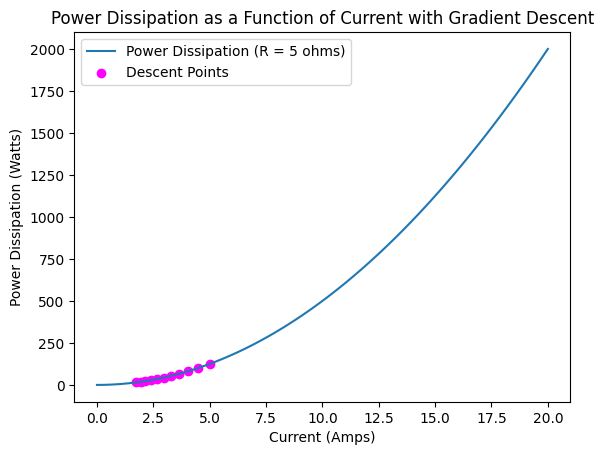

Final Current that minimizes power dissipation: I = 1.7434 A


In [58]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

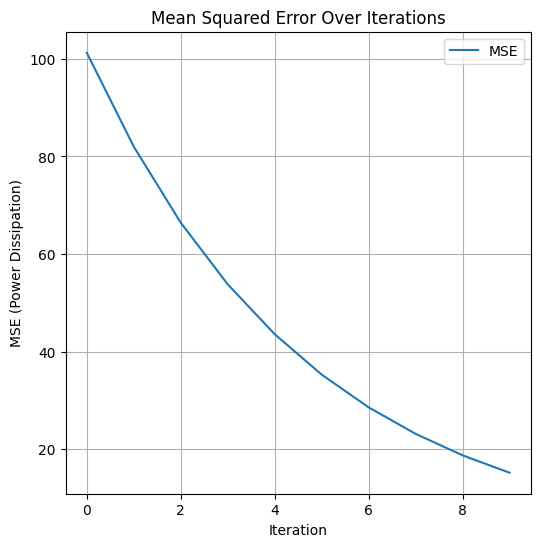

In [59]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Power Dissipation)")
plt.grid(True)
plt.legend()
plt.show()

If we try with more iterations, we should get to zero. We can see in the MSE plot how it is reduced in each iteration.

In [60]:
# Run gradient descent
I_values, mse_values = derivative_descent(gradient, alpha=0.01, I_0=5, max_iter=100)

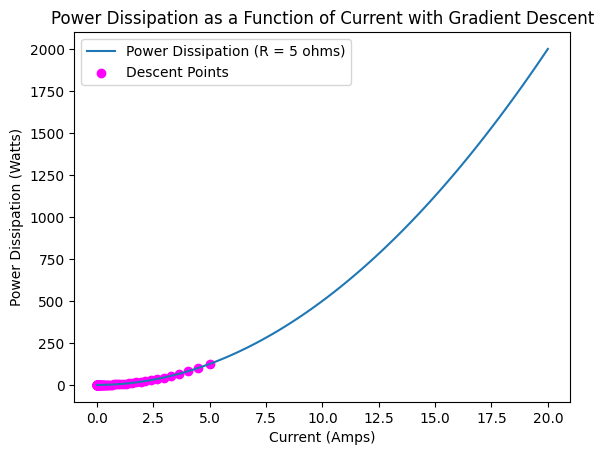

Final Current that minimizes power dissipation: I = 0.0001 A


In [61]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

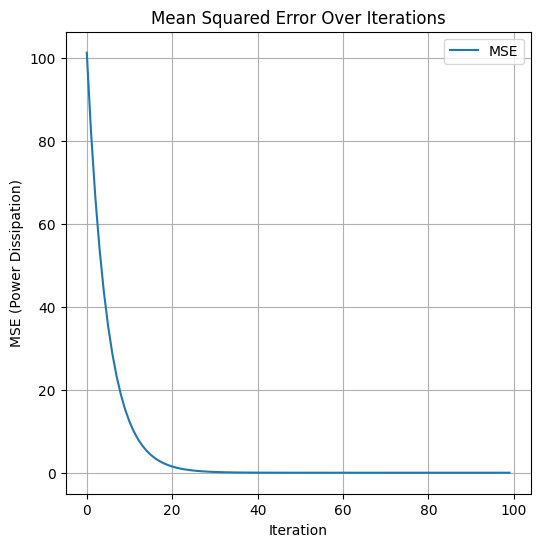

In [62]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Power Dissipation)")
plt.grid(True)
plt.legend()
plt.show()

This time, we reached 0 errors around the iteration 30. I'll see what happens when increasing alpha.

In [71]:
# Run gradient descent
I_values, mse_values = derivative_descent(gradient, alpha=0.075, I_0=5, max_iter=10)

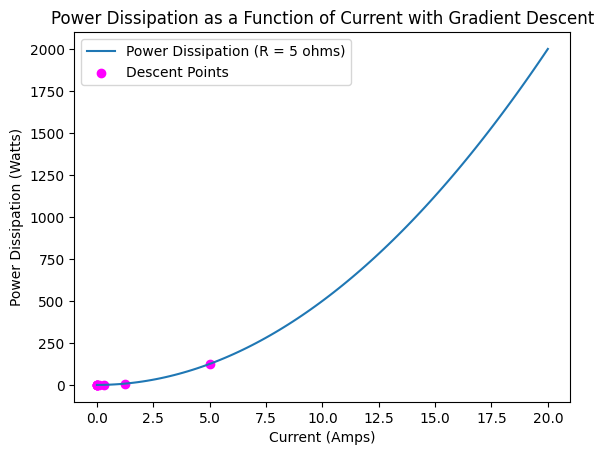

Final Current that minimizes power dissipation: I = 0.0001 A


In [72]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

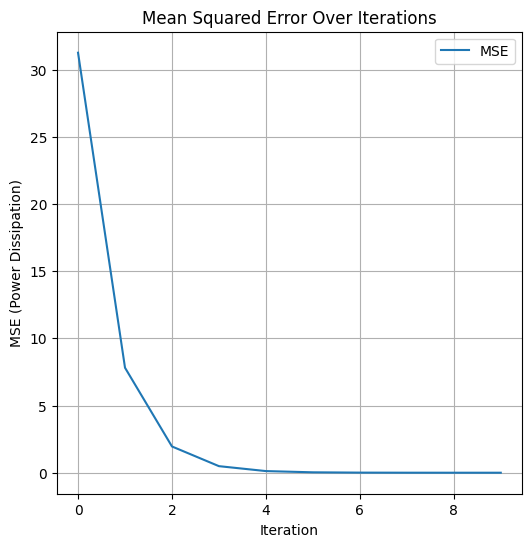

In [70]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Power Dissipation)")
plt.grid(True)
plt.legend()
plt.show()

## Conclusion
This project demonstrates how the Gradient Descent algorithm can be implemented from scratch and used to solve a linear regression problem. By adjusting hyperparameters like the learning rate and initial parameters, we can influence the convergence behavior of the algorithm. Visualizing the MSE and the iterations in the function provides insights into the optimization process and the effectiveness of Gradient Descent.